In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
%matplotlib inline

In [2]:
data = pd.read_csv("cleaned_data.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [3]:
features_response = data.columns
features_response, len(features_response)

(Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'default payment next month', 'EDUCATION_CAT', 'graduate school',
        'high school', 'others', 'university'],
       dtype='object'), 30)

In [4]:
columns_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [5]:
features_response = [column for column in features_response if column not in columns_to_remove]
features_response, len(features_response)

(['LIMIT_BAL',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_1',
  'BILL_AMT1',
  'BILL_AMT2',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT2',
  'PAY_AMT3',
  'PAY_AMT4',
  'PAY_AMT5',
  'PAY_AMT6',
  'default payment next month'],
 18)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
X = data[features_response[:-1]]
y = data[features_response[-1]]

In [8]:
X.shape, y.shape

((26664, 17), (26664,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21331, 17), (21331,), (5333, 17), (5333,))

In [10]:
dt_model = tree.DecisionTreeClassifier(max_depth = 2)
dt_model

DecisionTreeClassifier(max_depth=2)

In [11]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [12]:
# conda install python-graphviz

In [13]:
dot_data = tree.export_graphviz(dt_model, filled=True,
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

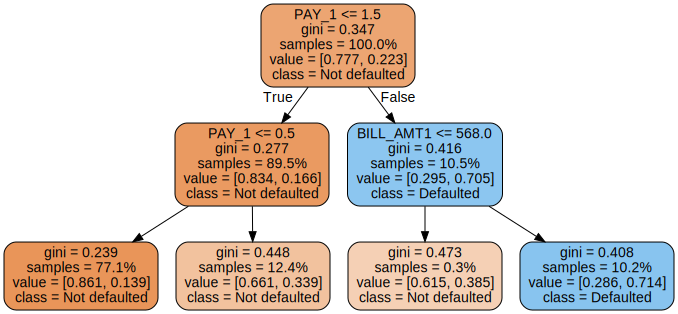

In [14]:
graph = graphviz.Source(dot_data)
graph

In [16]:
dt_model = tree.DecisionTreeClassifier()
dt_model

DecisionTreeClassifier()

In [17]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

In [23]:
cv = GridSearchCV(dt_model, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [24]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    3.1s finished
C:\Users\venug\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), iid=False,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [25]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.024772,0.006513,0.103909,0.173635,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.035250,0.001480,0.003233,0.000422,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.060008,0.000705,0.002999,0.000001,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.084750,0.000829,0.003000,0.000003,6,{'max_depth': 6},0.743836,0.746693,0.750391,0.741588,0.745627,0.003292,1,0.782202,0.780044,0.775228,0.774776,0.778062,0.003158
4,0.110255,0.001633,0.003997,0.000012,8,{'max_depth': 8},0.726301,0.731675,0.749985,0.731598,0.734890,0.008983,3,0.812035,0.808353,0.803554,0.802046,0.806497,0.003956
5,0.134247,0.002169,0.003508,0.000491,10,{'max_depth': 10},0.709873,0.702428,0.717270,0.714672,0.711061,0.005647,4,0.849320,0.854355,0.840974,0.836230,0.845220,0.007055
6,0.171248,0.012573,0.003750,0.000432,12,{'max_depth': 12},0.672927,0.657846,0.677122,0.682604,0.672625,0.009197,6,0.890307,0.903330,0.885715,0.876277,0.888907,0.009743


In [26]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

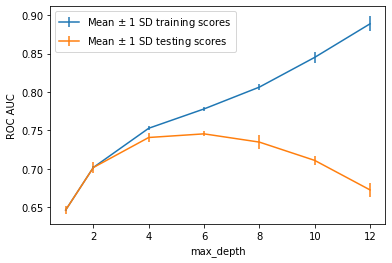

In [27]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [29]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=6)

In [31]:
dt_model = tree.DecisionTreeClassifier(max_depth=6)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [32]:
from sklearn import metrics

In [35]:
print("ROC AUC score with Decision Tree", metrics.roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1]))

ROC AUC score with Decision Tree 0.7425680590352683
